<a href="https://colab.research.google.com/github/illbeok17/1/blob/main/%E9%95%B7%E6%A6%AE%E6%B5%B7%E9%81%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd

def get_twse_stock_data(stock_no, year, month):
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date={year}{month:02d}01&stockNo={stock_no}"
    df = pd.read_csv(url, skiprows=1, encoding='big5')
    return df

# 獲取2020年1月至今的資料
all_data = []
for year in range(2020, 2024):
    for month in range(1, 13):
        if year == 2023 and month > 12:  # 調整至最新月份
            break
        df = get_twse_stock_data("2603", year, month)
        all_data.append(df)

full_data = pd.concat(all_data)
full_data.to_csv('2603_TWSE_2020_present.csv')

In [2]:
import requests
import pandas as pd

def get_twse_stock_data(stock_no, year, month):
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date={year}{month:02d}01&stockNo={stock_no}"
    df = pd.read_csv(url, skiprows=1, encoding='big5')
    return df

# 獲取2020年1月至今的資料
all_data = []
for year in range(2020, 2024):
    for month in range(1, 13):
        if year == 2023 and month > 12:  # 調整至最新月份
            break
        df = get_twse_stock_data("2603", year, month)
        all_data.append(df)

full_data = pd.concat(all_data)
full_data.to_csv('2603_TWSE_2020_present.csv')

In [4]:
import requests
import pandas as pd
from io import StringIO
from datetime import datetime

def get_twse_stock_data(stock_no, year, month):
    """從 TWSE 下載股票日交易資料"""
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date={year}{month:02d}01&stockNo={stock_no}"
    try:
        response = requests.get(url, timeout=10)
        response.encoding = "big5"  # 台灣證交所使用 big5 編碼
        df = pd.read_csv(StringIO(response.text), skiprows=1)
        return df
    except Exception as e:
        print(f"下載 {year}-{month:02d} 資料失敗: {e}")
        return None

def clean_data(df):
    """清理資料格式"""
    if df is None or df.empty:
        return None
    # 重新命名欄位 (中文轉英文)
    df.columns = [
        "Date", "Volume", "Turnover", "Open", "High",
        "Low", "Close", "Change", "Transactions","Change%"
    ]
    # 轉換日期格式 (民國年 → 西元年)
    df["Date"] = df["Date"].str.replace("112", "2023").str.replace("113", "2024")  # 依年份調整
    df["Date"] = pd.to_datetime(df["Date"], format="%Y/%m/%d")
    # 轉換數字格式 (去除逗號)
    for col in ["Volume", "Turnover", "Open", "High", "Low", "Close", "Transactions"]:
        df[col] = df[col].astype(str).str.replace(",", "").astype(float)
    return df

# 下載長榮海運 (2603) 從 2020 年至今的資料
stock_code = "2603"
current_year = datetime.now().year
current_month = datetime.now().month

all_data = []
for year in range(2020, current_year + 1):
    for month in range(1, 13):
        if year == current_year and month > current_month:
            continue  # 跳過未來的月份
        print(f"正在下載 {year} 年 {month} 月資料...")
        monthly_data = get_twse_stock_data(stock_code, year, month)
        cleaned_data = clean_data(monthly_data)
        if cleaned_data is not None:
            all_data.append(cleaned_data)

# 合併所有資料並存成 Excel
if all_data:
    final_df = pd.concat(all_data).sort_values("Date")
    output_file = f"Evergreen_Marine_{stock_code}_2020_to_present.xlsx"
    final_df.to_excel(output_file, index=False, sheet_name="Stock Data")
    print(f"資料已成功匯出至 {output_file}")
    # 在 Colab 中直接下載 Excel 檔案
    from google.colab import files
    files.download(output_file)
else:
    print("沒有下載到任何資料！")

正在下載 2020 年 1 月資料...


ValueError: time data "109/01/02" doesn't match format "%Y/%m/%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [5]:
import requests
import pandas as pd
from io import StringIO
from datetime import datetime

def get_twse_stock_data(stock_no, year, month):
    """從 TWSE 下載股票日交易資料"""
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date={year}{month:02d}01&stockNo={stock_no}"
    try:
        response = requests.get(url, timeout=10)
        response.encoding = "big5"  # 台灣證交所使用 big5 編碼
        df = pd.read_csv(StringIO(response.text), skiprows=1)
        return df
    except Exception as e:
        print(f"下載 {year}-{month:02d} 資料失敗: {e}")
        return None

def clean_data(df):
    """清理資料格式"""
    if df is None or df.empty:
        return None
    # 重新命名欄位 (中文轉英文)
    # Adjusting column names based on actual data inspection might be needed
    # as the number of columns can vary and include a '備註' column
    # For now, assuming the structure is consistent after skiprows=1
    original_columns = df.columns.tolist()
    expected_columns = [
        "Date", "Volume", "Turnover", "Open", "High",
        "Low", "Close", "Change", "Transactions","Change%"
    ]
    # Check if the number of columns matches expectations, excluding a potential '備註' column
    if len(original_columns) in [len(expected_columns), len(expected_columns) + 1]:
         # If there's an extra column (likely '備註'), exclude it before renaming
         if len(original_columns) == len(expected_columns) + 1:
              df = df.iloc[:, :-1] # Drop the last column
         df.columns = expected_columns
    else:
         print(f"Warning: Unexpected number of columns ({len(original_columns)}). Data cleaning might be incorrect.")
         # Attempt to infer column names based on typical TWSE data structure if possible
         # Or return None/raise error if structure is completely unexpected
         return None # Returning None as a safer approach if columns are unexpected


    # 轉換日期格式 (民國年 → 西元年)
    # Use a function to convert each date string
    def convert_minguo_to_western(date_str):
        parts = date_str.split('/')
        if len(parts) == 3:
            try:
                minguo_year = int(parts[0])
                western_year = minguo_year + 1911
                return f"{western_year}/{parts[1]}/{parts[2]}"
            except ValueError:
                return date_str # Return original string if conversion fails
        return date_str # Return original string if format is unexpected

    df["Date"] = df["Date"].apply(convert_minguo_to_western)

    # Convert to datetime objects
    df["Date"] = pd.to_datetime(df["Date"], format= passing `format`)

    # 轉換數字格式 (去除逗號)
    for col in ["Volume", "Turnover", "Open", "High", "Low", "Close", "Transactions"]:
        # Use errors='coerce' to turn non-numeric values into NaN, then fill or drop
        df[col] = df[col].astype(str).str.replace(",", "").astype(float, errors='coerce')

    return df

# 下載長榮海運 (2603) 從 2020 年至今的資料
stock_code = "2603"
current_year = datetime.now().year
current_month = datetime.now().month

all_data = []
for year in range(2020, current_year + 1):
    for month in range(1, 13):
        if year == current_year and month > current_month:
            continue  # 跳過未來的月份
        print(f"正在下載 {year} 年 {month} 月資料...")
        monthly_data = get_twse_stock_data(stock_code, year, month)
        cleaned_data = clean_data(monthly_data)
        if cleaned_data is not None:
            all_data.append(cleaned_data)

# 合併所有資料並存成 Excel
if all_data:
    final_df = pd.concat(all_data).sort_values("Date")
    output_file = f"Evergreen_Marine_{stock_code}_2020_to_present.xlsx"
    final_df.to_excel(output_file, index=False, sheet_name="Stock Data")
    print(f"資料已成功匯出至 {output_file}")
    # 在 Colab 中直接下載 Excel 檔案
    try:
        from google.colab import files
        files.download(output_file)
    except ImportError:
        print("請在 Google Colab 環境中執行此腳本以下載檔案。")
else:
    print("沒有下載到任何資料！")

正在下載 2020 年 1 月資料...


ValueError: time data "說明:" doesn't match format "%Y/%m/%d", at position 15. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [6]:
import requests
import pandas as pd
from io import StringIO
from datetime import datetime

def get_twse_stock_data(stock_no, year, month):
    """從 TWSE 下載股票日交易資料"""
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date={year}{month:02d}01&stockNo={stock_no}"
    try:
        response = requests.get(url, timeout=10)
        response.encoding = "big5"

        # 過濾掉非數據行（包含"說明:"的行）
        lines = [line for line in response.text.split('\n') if "說明:" not in line and len(line.split(',')) > 5]
        filtered_text = '\n'.join(lines)

        df = pd.read_csv(StringIO(filtered_text), skiprows=1)
        return df
    except Exception as e:
        print(f"下載 {year}-{month:02d} 資料失敗: {e}")
        return None

def clean_data(df):
    """清理資料格式"""
    if df is None or df.empty:
        return None

    # 動態適應欄位結構
    if len(df.columns) == 10:
        df.columns = [
            "Date", "Volume", "Turnover", "Open", "High",
            "Low", "Close", "Change", "Transactions", "Change%"
        ]
    elif len(df.columns) == 9:
        df.columns = [
            "Date", "Volume", "Turnover", "Open", "High",
            "Low", "Close", "Change", "Transactions"
        ]
    else:
        print(f"未知的欄位結構: {df.columns.tolist()}")
        return None

    try:
        # 轉換日期格式（處理民國年）
        df["Date"] = df["Date"].str.replace("年", "/").str.replace("月", "/").str.replace("日", "")
        df["Date"] = df["Date"].apply(lambda x: f"{int(x.split('/')[0])+1911}/{x.split('/')[1]}/{x.split('/')[2]}")
        df["Date"] = pd.to_datetime(df["Date"], format="%Y/%m/%d")
    except Exception as e:
        print(f"日期轉換錯誤: {e}")
        return None

    # 轉換數字格式
    numeric_cols = [col for col in df.columns if col != "Date"]
    for col in numeric_cols:
        try:
            df[col] = df[col].astype(str).str.replace(",", "").replace("--", "0").replace("X", "0").astype(float)
        except:
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", "").replace("--", "0").replace("X", "0"), errors='coerce')

    return df.dropna(subset=["Date"])  # 移除日期無效的行

# 主程式
stock_code = "2603"
current_year = datetime.now().year
current_month = datetime.now().month

all_data = []
for year in range(2020, current_year + 1):
    for month in range(1, 13):
        if year == current_year and month > current_month:
            continue
        print(f"正在下載 {year} 年 {month} 月資料...")
        monthly_data = get_twse_stock_data(stock_code, year, month)
        if monthly_data is not None:
            cleaned_data = clean_data(monthly_data)
            if cleaned_data is not None and not cleaned_data.empty:
                all_data.append(cleaned_data)

if all_data:
    final_df = pd.concat(all_data).sort_values("Date")
    output_file = f"Evergreen_Marine_{stock_code}_2020_to_present.xlsx"

    # 確保輸出目錄存在
    from pathlib import Path
    Path(output_file).parent.mkdir(parents=True, exist_ok=True)

    final_df.to_excel(output_file, index=False)
    print(f"資料已成功匯出至 {output_file}")

    # 如果是Colab環境，提供下載連結
    if 'google.colab' in str(get_ipython()):
        from google.colab import files
        files.download(output_file)
else:
    print("沒有下載到任何有效資料！")


正在下載 2020 年 1 月資料...
正在下載 2020 年 2 月資料...
正在下載 2020 年 3 月資料...
正在下載 2020 年 4 月資料...
正在下載 2020 年 5 月資料...
正在下載 2020 年 6 月資料...
正在下載 2020 年 7 月資料...
正在下載 2020 年 8 月資料...
正在下載 2020 年 9 月資料...
正在下載 2020 年 10 月資料...
正在下載 2020 年 11 月資料...
正在下載 2020 年 12 月資料...
正在下載 2021 年 1 月資料...
正在下載 2021 年 2 月資料...
正在下載 2021 年 3 月資料...
正在下載 2021 年 4 月資料...
正在下載 2021 年 5 月資料...
正在下載 2021 年 6 月資料...
正在下載 2021 年 7 月資料...
正在下載 2021 年 8 月資料...
正在下載 2021 年 9 月資料...
正在下載 2021 年 10 月資料...
正在下載 2021 年 11 月資料...
正在下載 2021 年 12 月資料...
正在下載 2022 年 1 月資料...
正在下載 2022 年 2 月資料...
正在下載 2022 年 3 月資料...
正在下載 2022 年 4 月資料...
正在下載 2022 年 5 月資料...
正在下載 2022 年 6 月資料...
正在下載 2022 年 7 月資料...
正在下載 2022 年 8 月資料...
正在下載 2022 年 9 月資料...
正在下載 2022 年 10 月資料...
正在下載 2022 年 11 月資料...
正在下載 2022 年 12 月資料...
正在下載 2023 年 1 月資料...
正在下載 2023 年 2 月資料...
正在下載 2023 年 3 月資料...
正在下載 2023 年 4 月資料...
正在下載 2023 年 5 月資料...
正在下載 2023 年 6 月資料...
正在下載 2023 年 7 月資料...
正在下載 2023 年 8 月資料...
正在下載 2023 年 9 月資料...
正在下載 2023 年 10 月資料...
正在下載 2023 年 11 月資料...
正在

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27054 (\N{CJK UNIFIED IDEOGRAPH-69AE}) missing from font(s) DejaVu Sans.
  fig.canvas

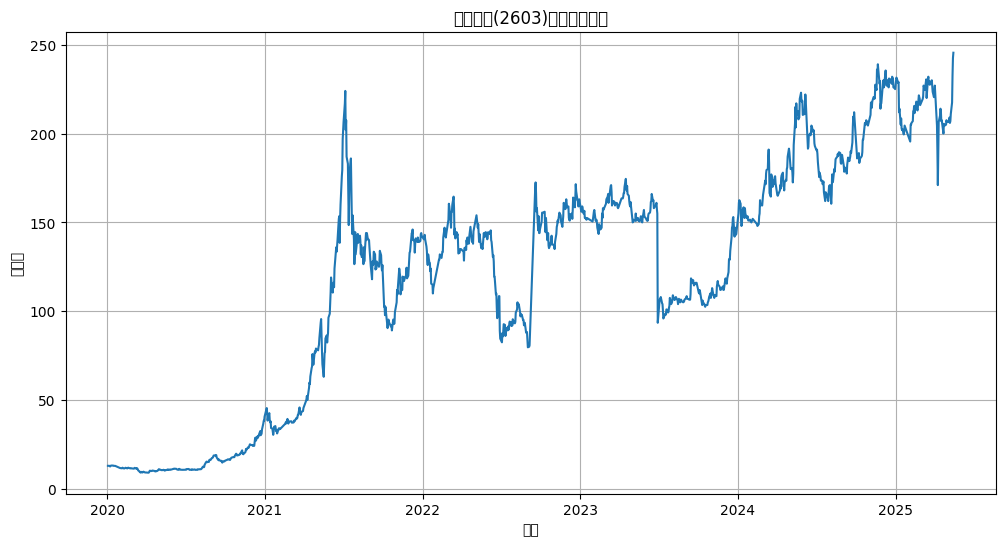

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# 加載數據
data = pd.read_excel('/長榮股價.xlsx', sheet_name='Sheet1')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 使用收盤價(Close)作為分析對象
close_price = data['Close'].dropna()

# 繪製股價走勢圖
plt.figure(figsize=(12,6))
plt.plot(close_price)
plt.title('長榮海運(2603)歷史股價走勢')
plt.xlabel('日期')
plt.ylabel('收盤價')
plt.grid()
plt.show()

In [8]:
# ADF檢驗
result = adfuller(close_price)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# 如果p值大於0.05，則需要差分
if result[1] > 0.05:
    print("序列不平穩，需要差分處理")
    diff_price = close_price.diff().dropna()
    # 再次檢驗
    result_diff = adfuller(diff_price)
    print('\n差分後ADF檢驗:')
    print('ADF Statistic:', result_diff[0])
    print('p-value:', result_diff[1])
else:
    print("序列是平穩的")

ADF Statistic: -1.2265228981977836
p-value: 0.6620834522512642
Critical Values:
	1%: -3.435699433298302
	5%: -2.863902271843875
	10%: -2.5680277086214076
序列不平穩，需要差分處理

差分後ADF檢驗:
ADF Statistic: -21.723641561340063
p-value: 0.0


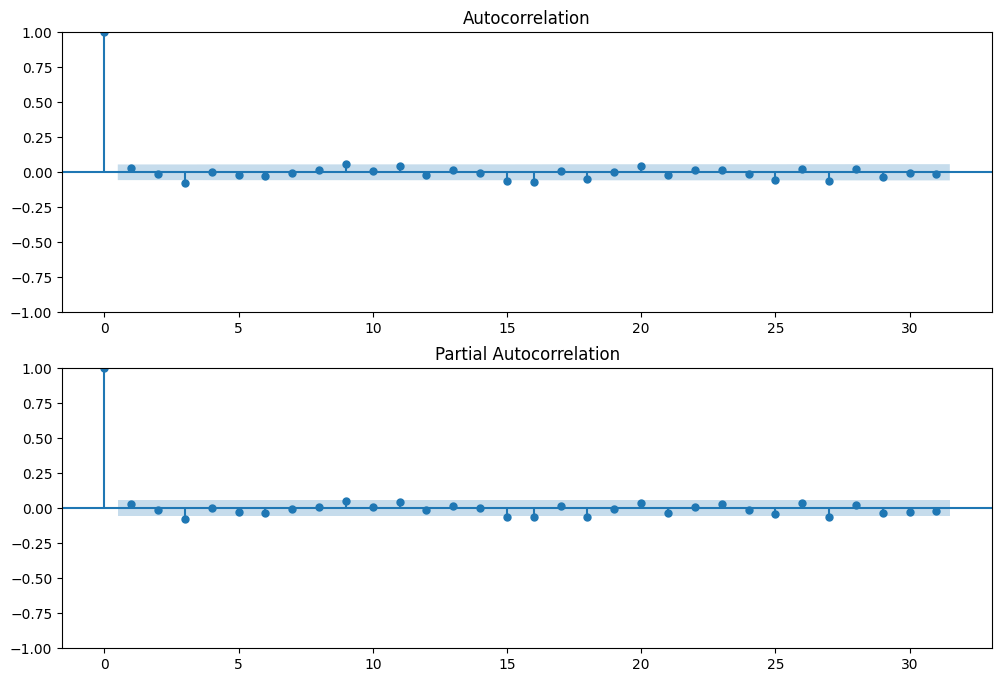

In [9]:
# 繪製ACF和PACF圖
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(close_price.diff().dropna(), ax=ax1)
plot_pacf(close_price.diff().dropna(), ax=ax2)
plt.show()

In [10]:
# 分割訓練集和測試集
train_size = int(len(close_price) * 0.8)
train, test = close_price[:train_size], close_price[train_size:]

# 建立ARIMA模型 (參數需要根據ACF/PACF調整)
model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit(disp=False)

# 模型摘要
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  983
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3057.514
Date:                Fri, 16 May 2025   AIC                           6121.028
Time:                        02:25:10   BIC                           6135.697
Sample:                             0   HQIC                          6126.609
                                - 983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1051      1.137     -0.092      0.926      -2.333       2.123
ma.L1          0.1257      1.136      0.111      0.912      -2.100       2.352
sigma2        29.6437      0.207    143.068      0.0

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27544 (\N{CJK UNIFIED IDEOGRAPH-6B98}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


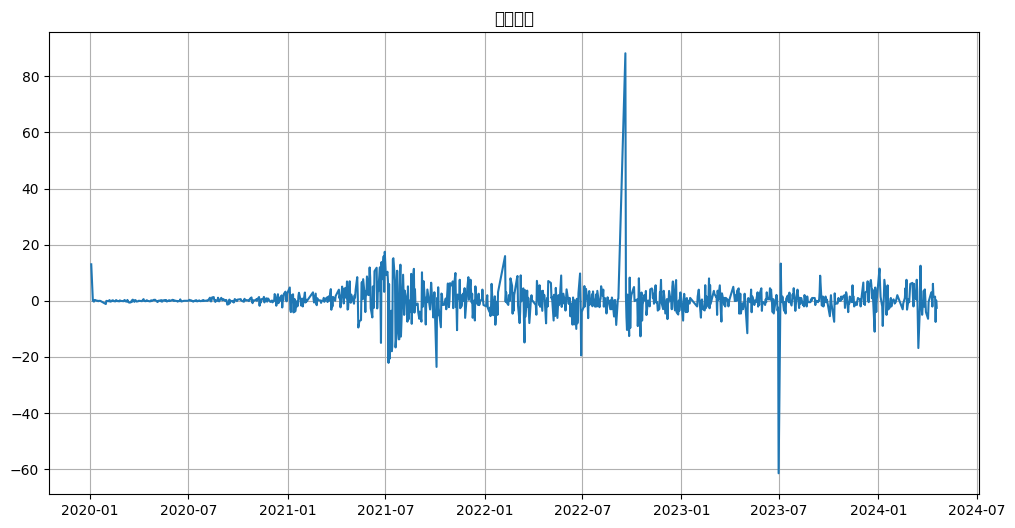

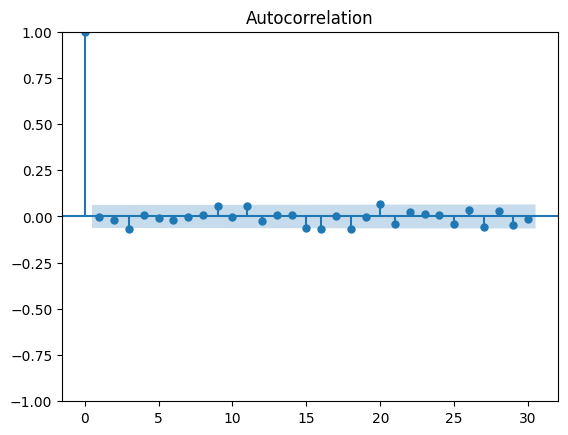

In [11]:
# 繪製殘差圖
residuals = model_fit.resid
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('模型殘差')
plt.grid()
plt.show()

# 殘差ACF圖
plot_acf(residuals)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyp

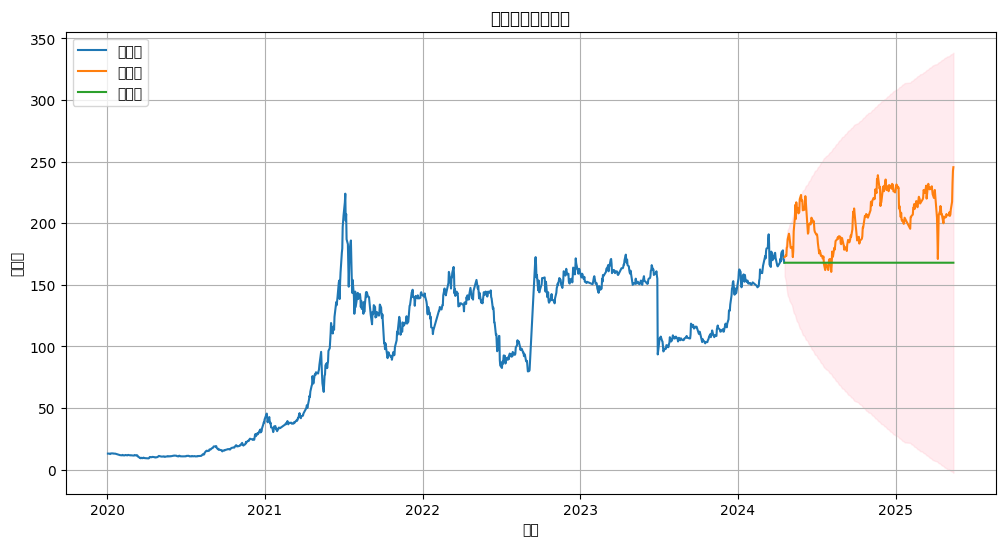

測試集RMSE: 41.262370438040314


In [12]:
# 預測
forecast_steps = len(test)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# 繪製預測結果
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='訓練集')
plt.plot(test.index, test, label='實際值')
plt.plot(test.index, forecast_mean, label='預測值')
plt.fill_between(test.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title('長榮海運股價預測')
plt.xlabel('日期')
plt.ylabel('收盤價')
plt.legend()
plt.grid()
plt.show()

# 計算RMSE
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
print(f'測試集RMSE: {rmse}')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/

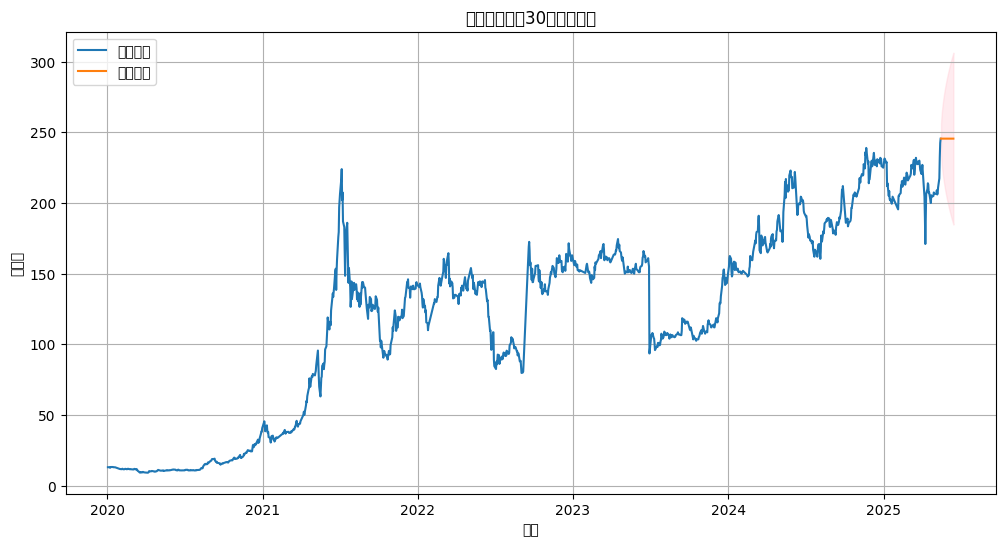

未來30天預測結果:
             日期       預測收盤價          下限          上限
1229 2025-05-16  245.577413  234.805956  256.348871
1230 2025-05-17  245.574348  230.088416  261.060281
1231 2025-05-18  245.574470  226.514258  264.634682
1232 2025-05-19  245.574465  223.511337  267.637593
1233 2025-05-20  245.574465  220.870801  270.278130
1234 2025-05-21  245.574465  218.486451  272.662479
1235 2025-05-22  245.574465  216.295634  274.853296
1236 2025-05-23  245.574465  214.257706  276.891224
1237 2025-05-24  245.574465  212.344526  278.804404
1238 2025-05-25  245.574465  210.535654  280.613276
1239 2025-05-26  245.574465  208.815687  282.333243
1240 2025-05-27  245.574465  207.172679  283.976252
1241 2025-05-28  245.574465  205.597138  285.551792
1242 2025-05-29  245.574465  204.081380  287.067550
1243 2025-05-30  245.574465  202.619075  288.529855
1244 2025-05-31  245.574465  201.204937  289.943993
1245 2025-06-01  245.574465  199.834499  291.314431
1246 2025-06-02  245.574465  198.503945  292.644986
1

In [14]:
# 使用全部數據重新訓練模型
final_model = SARIMAX(close_price, order=(1,1,1), seasonal_order=(0,0,0,0))
final_model_fit = final_model.fit(disp=False)

# 未來30天預測
future_steps = 30
future_forecast = final_model_fit.get_forecast(steps=future_steps)
future_mean = future_forecast.predicted_mean
future_conf_int = future_forecast.conf_int()

# 生成未來日期
last_date = close_price.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# 繪製未來預測
plt.figure(figsize=(12,6))
plt.plot(close_price.index, close_price, label='歷史數據')
plt.plot(future_dates, future_mean, label='未來預測')
plt.fill_between(future_dates, future_conf_int.iloc[:,0], future_conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title('長榮海運未來30天股價預測')
plt.xlabel('日期')
plt.ylabel('收盤價')
plt.legend()
plt.grid()
plt.show()

# 輸出預測結果
print("未來30天預測結果:")
print(pd.DataFrame({
    '日期': future_dates,
    '預測收盤價': future_mean,
    '下限': future_conf_int.iloc[:,0],
    '上限': future_conf_int.iloc[:,1]
}))